# Deprecated

0                 NOVA
1           NOVA-RELAX
2                 PMFS
3               KILLER
4    SplitFS-FILEBENCH
5             EXT4-DAX
6              XFS-DAX
Name: file_system, dtype: object


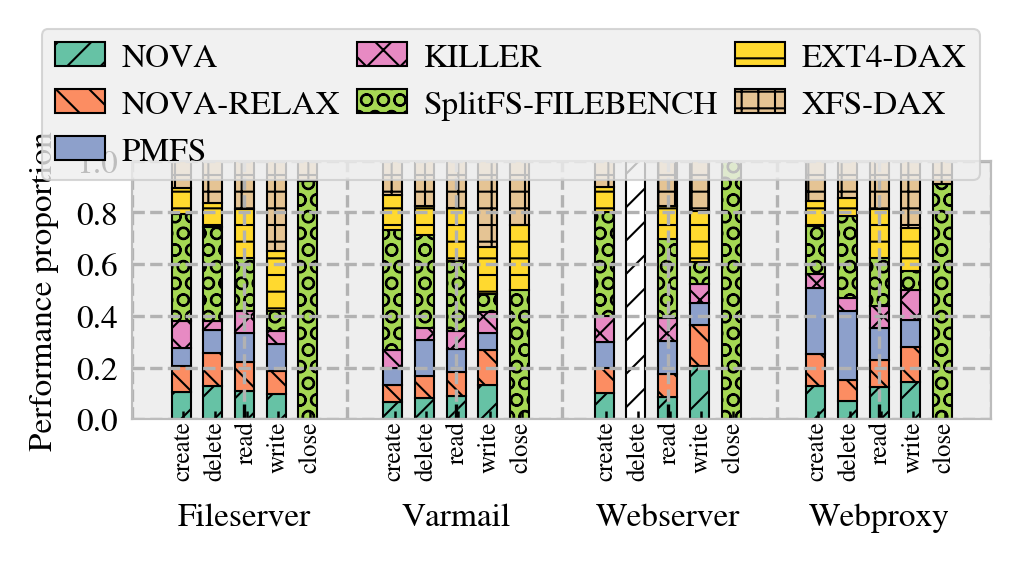

In [1]:
# # ipython -c "%run plot.ipynb"

# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import style
# from matplotlib.ticker import AutoMinorLocator, MultipleLocator
# import pandas as pd

# # Paper specific settings
# STANDARD_WIDTH = 17.8
# SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
# DOUBLE_COL_WIDTH = STANDARD_WIDTH
# def cm_to_inch(value):
#     return value/2.54
    
# # matplotlib style settings
# plt.rcParams.update(plt.rcParamsDefault)
# matplotlib.rcParams['text.usetex'] = False
# style.use('bmh')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "both"
# plt.rcParams["axes.linewidth"] = 0.5
# plt.rcParams["grid.linewidth"] = 0.8
# plt.rcParams["font.family"] = "Nimbus Roman"
# plt.rcParams['hatch.linewidth'] = 0.5
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# # Data Preprocessing
# # with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# # Plotting Settings
# # fig,ax = plt.subplots()
# # fig.set_size_inches(cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4))
# # fig.set_dpi(300)
# fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))


# bar_width = 0.15
# # patterns = ['..', '//', '\\\\', 'XX', '']
# # Reference: https://designbro.com/blog/inspiration/color-combinations/
# # colors = ["#1d3557", "#457b9d", "#a8dadc", "#e63946", "#f1faee"] 
# # colors.reverse()
# # times = ["allocate", "update-meta", "update-dram", "write-data", "other"]
# patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# workloads = ["fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
# times = ["create", "delete", "read", "write", "close"]
# x = [1, 2, 3, 4]
# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
# tot = len(times) * bar_width


# def normalize_workload_attr(df, workload: str, attr: str):
#     if df[(df['file_bench'] == workload) & (df['threads'] == 1)][attr].sum() == 0:
#         return 
#     else:
#         value = df[(df['file_bench'] == workload) & (df['threads'] == 1)][attr] / df[(df['file_bench'] == workload) & (df['threads'] == 1)][attr].sum()
#     df.loc[(df['file_bench'] == workload) & (df['threads'] == 1), attr] = value

# for workload in workloads:
#     normalize_workload_attr(df, workload, "create")
#     normalize_workload_attr(df, workload, "delete")
#     normalize_workload_attr(df, workload, "read")
#     normalize_workload_attr(df, workload, "write")
#     normalize_workload_attr(df, workload, "close")

# global_points = []
# print(fss)
# for time_idx, time in enumerate(times):
#     for workload_idx, workload in enumerate(workloads):
#         point = x[workload_idx] - tot / 2 + bar_width / 2 + time_idx * bar_width
#         bottom = 0
#         all_zero = True
#         for fs_idx, fs in enumerate(fss):
#             height = df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == 1)][time].iloc[0]
#             if height != 0:
#                 all_zero = False
#             plt.bar(point, height=height, width=bar_width * 0.6, hatch=patterns[fs_idx], edgecolor='black', color=plt.get_cmap('Set2')(fs_idx), bottom=bottom, linewidth=0.5)
#             bottom += height

#         if all_zero == True:
#             plt.bar(point, height = 1, width=bar_width * 0.6, hatch='///', edgecolor='black', color='white', bottom=0, linewidth=0.5)
        
#         global_points.append((point + 0.01, workload, time))
        
# # Draw title
# plt.xticks(x, labels=["Fileserver", "Varmail", "Webserver", "Webproxy"], fontsize=8)
# plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=8)
# plt.ylim((0,1))
# plt.ylabel('Performance proportion', fontsize=8)

# # plt.xlabel("File Size (GiB)", fontsize=8) 

# fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8, columnspacing=0.5, handletextpad=0.5, handlelength=1.5)


# ax = plt.gca()

# # ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# # print([p[2] for p in global_points])
# ax.set_xticks([p[0] for p in global_points], minor=True)
# ax.set_xticklabels([p[2] for p in global_points], minor=True, fontsize=6, rotation=90, ha='center', va='top', y=0.05)
# ax.tick_params(which='both', bottom=False, top=False, left=False, right=False)
# ax.tick_params(axis='x', which='major', pad=(20))

# ax2 = ax.twiny()
# ax2.xaxis.set_minor_locator(AutoMinorLocator(1))
# # ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks([2, 3, 4], minor=True)
# ax2.set_xticklabels([])
# ax2.tick_params(which='both', bottom=False, top=False, left=False, right=False)

# plt.tight_layout()
# plt.show()
# plt.savefig("./FIG-OverheadsBreakdown.pdf", bbox_inches='tight', pad_inches=0)


# Breakdown

[0.3463687150837989, 0.8, 0.5625, 0.35]
[0.33891992551210426, 0.5333333333333333, 0.5625, 0.35]
[0.3649906890130354, 0.26666666666666666, 0.8125, 0.25]
[0.21415270018621974, 0.2, 0.3125, 0.1]
[0.41713221601489753, 0.33333333333333337, 1.0, 1.0]
[0.7467411545623837, 1.0, 0.43749999999999994, 0.25]
[1.0, 1.0, 0.8125, 0.45000000000000007]
[0.35, 0.5588235294117646, 0.6153846153846153, 0.2307692307692308]
[0.35, 0.47058823529411764, 0.6153846153846153, 0.2307692307692308]
[0.35, 0.2647058823529412, 0.923076923076923, 0.3846153846153846]
[0.25, 0.2647058823529412, 0.30769230769230765, 0.12820512820512822]
[1.0, 0.23529411764705882, 1.0, 1.0]
[0.8, 0.5882352941176471, 0.5384615384615383, 0.3076923076923077]
[0.7, 1.0, 0.923076923076923, 0.48717948717948717]
[0.2631578947368421, 0.2857142857142857, 1.0]
[0.2631578947368421, 0.3, 0.7647058823529412]
[0.2631578947368421, 0.3142857142857143, 0.41176470588235287]
[0.2631578947368421, 0.2857142857142857, 0.3529411764705882]
[1.0, 1.0, 0.4117647058

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


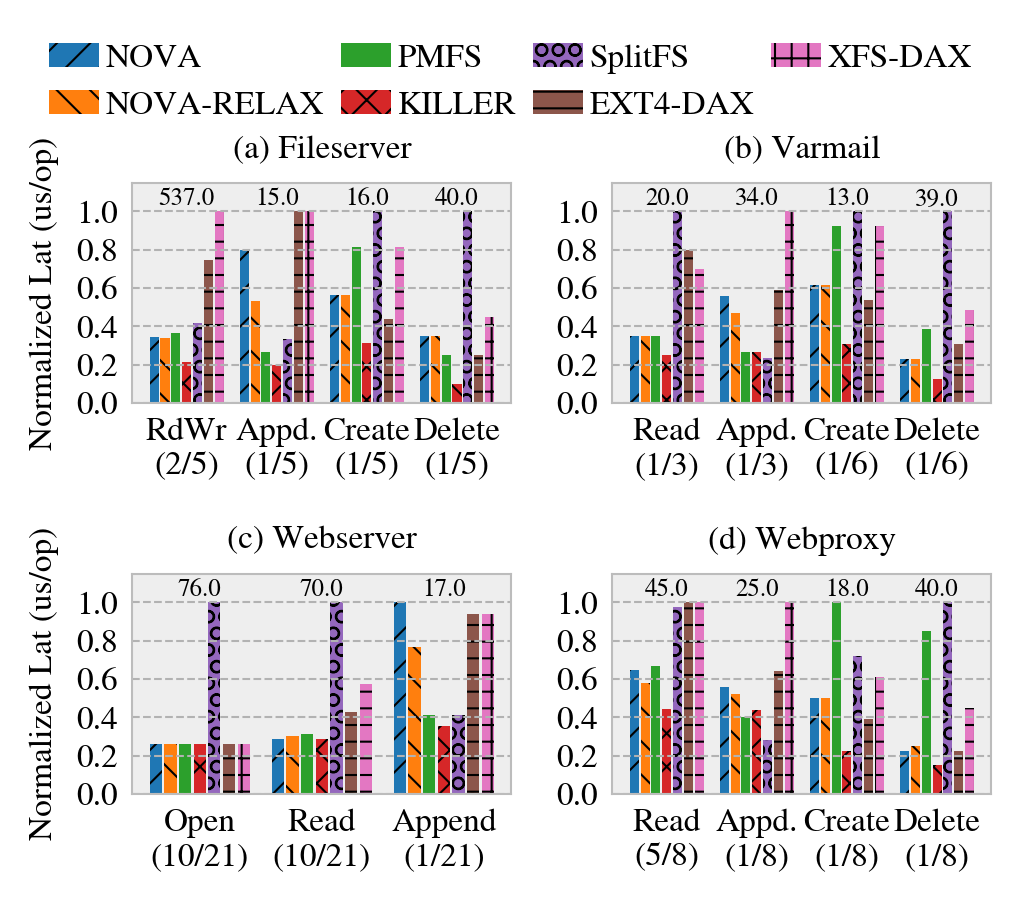

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(7)))
bar_width = 0.12
true_bar_width = 0.1
# subfig_titles = ["(a) Low Concurrency (1 thread)", "(b) High Concurrency (8 thread)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]
cmap = "tab10"
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

workloads = ["./performance-comparison-table-breakdown-fileserver", "./performance-comparison-table-breakdown-varmail", "./performance-comparison-table-breakdown-webserver", "./performance-comparison-table-breakdown-webproxy"]
workloads_remap = ["(a) Fileserver", "(b) Varmail", "(c) Webserver", "(d) Webproxy"]
# times = ["open", "append", "create", "delete"]
# times_remap = ["Open", "Append", "Create", "Delete"]
num_thread = 1
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
tot = len(fss) * bar_width
bars = []


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

for workload_idx, workload in enumerate(workloads):
    
    with open(workload, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
    
    times = [ "read", "append", "create", "delete"]
    
    if workload_idx == 0:
        times = [ "IO", "append", "create", "delete"]
        times_remap = ["RdWr\n(2/5)", "Appd.\n(1/5)", "Create\n(1/5)", "Delete\n(1/5)"]
    
    if workload_idx == 1:
        times_remap = ["Read\n(1/3)", "Appd.\n(1/3)", "Create\n(1/6)", "Delete\n(1/6)"]

    if workload_idx == 2:
        times = ["open", "read", "append"]
        times_remap = ["Open\n(10/21)", "Read\n(10/21)", "Append\n(1/21)"]
    
    if workload_idx == 3:
        times_remap = ["Read\n(5/8)", "Appd.\n(1/8)", "Create\n(1/8)", "Delete\n(1/8)"]

    x = list(range(1, len(times) + 1))
    subfig = plt.subplot(2, 2, workload_idx + 1)
    # Normalize
    max_times = []
    for time_idx, time in enumerate(times):
        # df[(df['threads'] == 1)][time] = df[(df['threads'] == 1)][time] / df[time].max()
        # print(df[(df['threads'] == 1)][time])
        max_times.append(df[(df['threads'] == num_thread)][time].max())
        df.loc[(df['threads'] == num_thread), time] = df[(df['threads'] == num_thread)][time] / df[(df['threads'] == num_thread)][time].max()

    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for time_idx, time in enumerate(times):
            if df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0] == 0:
                bws.append(0.01)
            else:
                bws.append(df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0])
        print(bws)
        # print(bws)
        # for fig_idx in range(0, len(num_threads)):
        #     for workload in workloads:
        #         bws.append(df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == num_threads[fig_idx])]['iops'].iloc[0])
        bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
        # draw max time on top of bar
        if fs == "KILLER":
            for point_idx, pivot in enumerate(x):
                plt.text(pivot, 1, "{:.1f}".format(max_times[point_idx] * 1000), fontsize=6, ha='center', va='bottom')

        # if fs == "KILLER":
        #     # Add value above bar
        #     for time_idx, time in enumerate(times):
        #         if bws[time_idx] == 0.01:
        #             text = "0.00"
        #         else:
        #             text = "{:.2f}".format(bws[time_idx])
        #         plt.text(points[time_idx] - 0.05, bws[time_idx] + 0.05, text, fontsize=5, rotation=90)

        # plt.bar(points, bws, width=bar_width, color='none', edgecolor='white', linewidth=0.5)
        bars.append(bar)
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)

        plt.tick_params(bottom=False, top=False, left=False, right=False)
        # Draw title
        plt.xticks(x, labels=times_remap, fontsize=8)
        plt.ylim((0, 1.15))
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
        if workload_idx == 0 or workload_idx == 2:
            plt.ylabel('Normalized Lat (us/op)', fontsize=8)
        # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
        plt.title(workloads_remap[workload_idx], fontsize=8)
    
legend_labels = fss
legend_labels = legend_labels.replace("SplitFS-FILEBENCH", "SplitFS")
# fig.legend(bars, legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
plt.tight_layout()
plt.savefig("./FIG-MacroBreakdown.pdf", bbox_inches='tight', pad_inches=0)


[0.8333333333333334, 4.0, 1.8000000000000003, 3.4999999999999996, 1.285714285714286, 1.9322033898305084]
[0.005, 0.012, 0.009000000000000001, 0.013999999999999999, 0.07200000000000001, 0.114]
[0.8333333333333334, 2.6666666666666665, 1.8000000000000003, 3.4999999999999996, 1.285714285714286, 1.8644067796610169]
[0.005, 0.008, 0.009000000000000001, 0.013999999999999999, 0.07200000000000001, 0.11]
[0.6666666666666666, 1.3333333333333333, 2.6, 2.5, 1.285714285714286, 2.101694915254237]
[0.004, 0.004, 0.013000000000000001, 0.01, 0.07200000000000001, 0.124]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.006, 0.003, 0.005, 0.004, 0.055999999999999994, 0.059000000000000004]
[3.666666666666667, 1.6666666666666667, 3.2, 10.0, 2.3928571428571432, 1.5254237288135593]
[0.022000000000000002, 0.005, 0.016, 0.04, 0.134, 0.09]
[1.0, 5.0, 1.4, 2.5, 2.196428571428572, 4.711864406779661]
[0.006, 0.015, 0.006999999999999999, 0.01, 0.12300000000000001, 0.278]
[1.0, 5.0, 2.6, 4.5, 2.160714285714286, 7.0508474576271185]
[

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


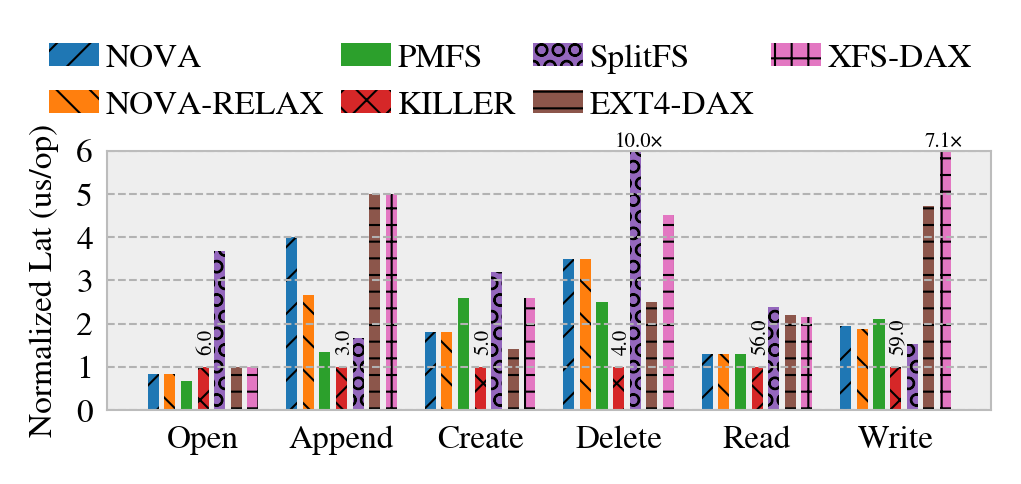

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df_orig = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))
bar_width = 0.12
true_bar_width = 0.08
# subfig_titles = ["(a) Low Concurrency (1 thread)", "(b) High Concurrency (8 thread)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]
cmap = "tab10"
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

workloads = ["fileserver.f"]
times = ["open", "append", "create", "delete", "read", "write"]
times_remap = ["Open", "Append", "Create", "Delete", "Read", "Write"]
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
tot = len(fss) * bar_width
x = list(range(1, len(times) + 1))
bars = []
subfig = plt.subplot(1, 1, 1)

# Normalize
for time_idx, time in enumerate(times):
    # df[(df['threads'] == 1)][time] = df[(df['threads'] == 1)][time] / df[time].max()
    # print(df[(df['threads'] == 1)][time])
    df.loc[(df['threads'] == 1), time] = df[(df['threads'] == 1)][time] / df[(df['threads'] == 1)][time].iloc[3]
    
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    bws = []
    abs_bws = []
    for time_idx, time in enumerate(times):
        if df[(df['file_system'] == fs) & (df['threads'] == 1)][time].iloc[0] == 0:
            bws.append(0.01)
            abs_bws.append(0.01)
        else:
            bws.append(df[(df['file_system'] == fs) & (df['threads'] == 1)][time].iloc[0])
            abs_bws.append(df_orig[(df_orig['file_system'] == fs) & (df_orig['threads'] == 1)][time].iloc[0])
    print(bws)
    print(abs_bws)
    # print(bws)
    # for fig_idx in range(0, len(num_threads)):
    #     for workload in workloads:
    #         bws.append(df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == num_threads[fig_idx])]['iops'].iloc[0])
    bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
    if fs == "KILLER":
        # Add value above bar
        for time_idx, time in enumerate(times):
            if bws[time_idx] == 0.01:
                text = "0.00"
            else:
                text = "{:.1f}".format(abs_bws[time_idx] * 1000)
            plt.text(points[time_idx] - 0.05, bws[time_idx] + 0.4, text, fontsize=5, rotation=90)

    if fs == "SplitFS-FILEBENCH":
        text = "{:.1f}×".format(bws[3])
        plt.text(points[3] - 0.15, 6.1, text, fontsize=5)
    if fs == "XFS-DAX":
        text = "{:.1f}×".format(bws[-1])
        plt.text(points[-1] - 0.15, 6.1, text, fontsize=5)

    # plt.bar(points, bws, width=bar_width, color='none', edgecolor='white', linewidth=0.5)
    bars.append(bar)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # Draw title
    plt.xticks(x, labels=times_remap, fontsize=8)
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    plt.ylim(0, 6)
    plt.yticks([0, 1, 2, 3, 4, 5, 6], fontsize=8)
    plt.ylabel('Normalized Lat (us/op)', fontsize=8)
    # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
    
legend_labels = fss
legend_labels = legend_labels.replace("SplitFS-FILEBENCH", "SplitFS")
# fig.legend(bars, legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
plt.tight_layout()
plt.savefig("./FIG-MacroBreakdown.pdf", bbox_inches='tight', pad_inches=0)


# Line Plot

[0.3463687150837989, 0.8, 0.5625, 0.35]
[0.33891992551210426, 0.5333333333333333, 0.5625, 0.35]
[0.3649906890130354, 0.26666666666666666, 0.8125, 0.25]
[0.21415270018621974, 0.2, 0.3125, 0.1]
[0.41713221601489753, 0.33333333333333337, 1.0, 1.0]
[0.7467411545623837, 1.0, 0.43749999999999994, 0.25]
[1.0, 1.0, 0.8125, 0.45000000000000007]
[0.35, 0.5588235294117646, 0.6153846153846153, 0.2307692307692308]
[0.35, 0.47058823529411764, 0.6153846153846153, 0.2307692307692308]
[0.35, 0.2647058823529412, 0.923076923076923, 0.3846153846153846]
[0.25, 0.2647058823529412, 0.30769230769230765, 0.12820512820512822]
[1.0, 0.23529411764705882, 1.0, 1.0]
[0.8, 0.5882352941176471, 0.5384615384615383, 0.3076923076923077]
[0.7, 1.0, 0.923076923076923, 0.48717948717948717]
[0.2631578947368421, 0.2857142857142857, 1.0]
[0.2631578947368421, 0.3, 0.7647058823529412]
[0.2631578947368421, 0.3142857142857143, 0.41176470588235287]
[0.2631578947368421, 0.2857142857142857, 0.3529411764705882]
[1.0, 1.0, 0.4117647058

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


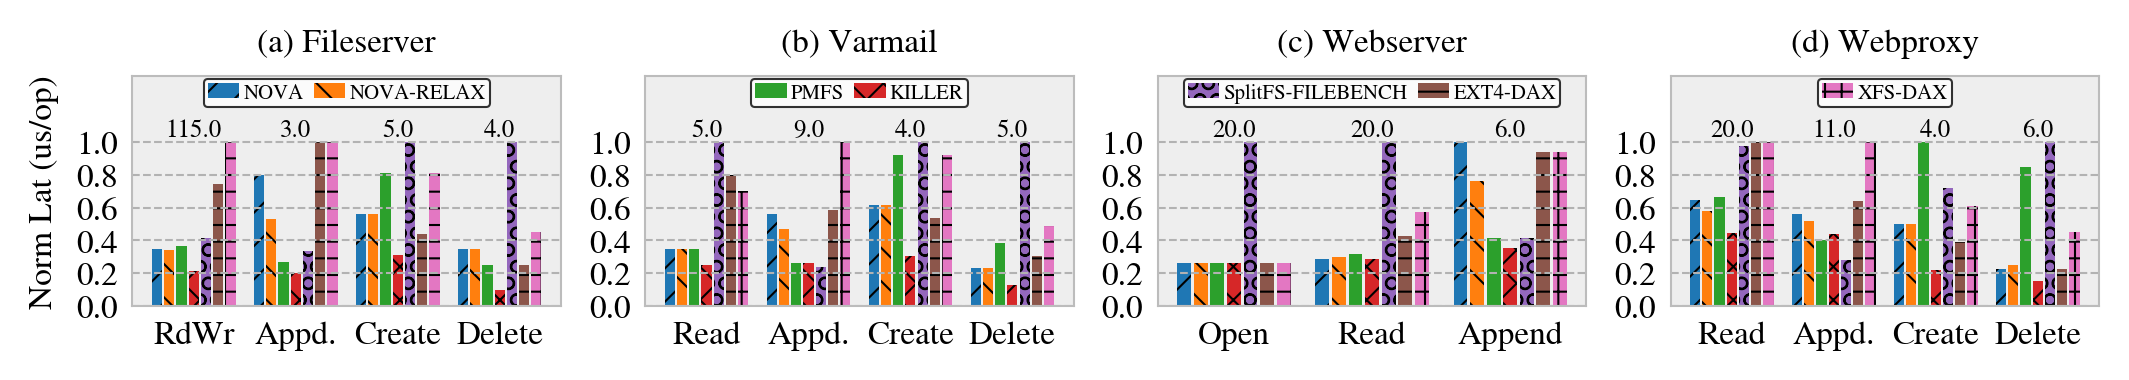

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(3)))
bar_width = 0.12
true_bar_width = 0.1
# subfig_titles = ["(a) Low Concurrency (1 thread)", "(b) High Concurrency (8 thread)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]
cmap = "tab10"
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

workloads = ["./performance-comparison-table-breakdown-fileserver", "./performance-comparison-table-breakdown-varmail", "./performance-comparison-table-breakdown-webserver", "./performance-comparison-table-breakdown-webproxy"]
workloads_remap = ["(a) Fileserver", "(b) Varmail", "(c) Webserver", "(d) Webproxy"]
# times = ["open", "append", "create", "delete"]
# times_remap = ["Open", "Append", "Create", "Delete"]
num_thread = 1
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
tot = len(fss) * bar_width
bars = []


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

for workload_idx, workload in enumerate(workloads):
    
    with open(workload, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
    
    times = [ "read", "append", "create", "delete"]
    
    if workload_idx == 0:
        times = [ "IO", "append", "create", "delete"]
        times_remap = ["RdWr", "Appd.", "Create", "Delete"]
    
    if workload_idx == 1:
        times_remap = ["Read", "Appd.", "Create", "Delete"]

    if workload_idx == 2:
        times = ["open", "read", "append"]
        times_remap = ["Open", "Read", "Append"]
    
    if workload_idx == 3:
        times_remap = ["Read", "Appd.", "Create", "Delete"]

    x = list(range(1, len(times) + 1))
    subfig = plt.subplot(1, 4, workload_idx + 1)
    # Normalize
    max_times = []
    killer_times = []
    for time_idx, time in enumerate(times):
        # df[(df['threads'] == 1)][time] = df[(df['threads'] == 1)][time] / df[time].max()
        # print(df[(df['threads'] == 1)][time])
        max_times.append(df[(df['threads'] == num_thread)][time].max())
        killer_times.append(df[(df['file_system'] == "KILLER") & (df['threads'] == num_thread)][time].iloc[0])
        df.loc[(df['threads'] == num_thread), time] = df[(df['threads'] == num_thread)][time] / df[(df['threads'] == num_thread)][time].max()

    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for time_idx, time in enumerate(times):
            if df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0] == 0:
                bws.append(0.01)
            else:
                bws.append(df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0])
        print(bws)
        # print(bws)
        # for fig_idx in range(0, len(num_threads)):
        #     for workload in workloads:
        #         bws.append(df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == num_threads[fig_idx])]['iops'].iloc[0])
        bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
        # draw max time on top of bar
        if fs == "KILLER":
            for point_idx, pivot in enumerate(x):
                plt.text(pivot, 1, "{:.1f}".format(killer_times[point_idx] * 1000), fontsize=6, ha='center', va='bottom')

        bars.append(bar)
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)

        plt.tick_params(bottom=False, top=False, left=False, right=False)
        # Draw title
        plt.xticks(x, labels=times_remap, fontsize=8)
        plt.ylim((0, 1.4))
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
        if workload_idx == 0:
            plt.ylabel('Norm Lat (us/op)', fontsize=8)
        # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
        plt.title(workloads_remap[workload_idx], fontsize=8)
    
legend_labels = fss
legend_labels = legend_labels.replace("SplitFS-FILEBENCH", "SplitFS")
steps = [2, 2, 2, 2]
for ax_id, ax in enumerate(fig.axes):
    start = sum(steps[:ax_id])
    end = start + steps[ax_id]

    leg = ax.legend(bars[start : end], fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=2, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    
    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
# fig.legend(bars, legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
# fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
plt.tight_layout(pad=0.4)
plt.savefig("./FIG-MacroBreakdown.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

# Vertical

[0.3463687150837989, 0.8, 0.5625, 0.35]
[0.33891992551210426, 0.5333333333333333, 0.5625, 0.35]
[0.3649906890130354, 0.26666666666666666, 0.8125, 0.25]
[0.21415270018621974, 0.2, 0.3125, 0.1]
[0.41713221601489753, 0.33333333333333337, 1.0, 1.0]
[0.7467411545623837, 1.0, 0.43749999999999994, 0.25]
[1.0, 1.0, 0.8125, 0.45000000000000007]
[0.35, 0.5588235294117646, 0.6153846153846153, 0.2307692307692308]
[0.35, 0.47058823529411764, 0.6153846153846153, 0.2307692307692308]
[0.35, 0.2647058823529412, 0.923076923076923, 0.3846153846153846]
[0.25, 0.2647058823529412, 0.30769230769230765, 0.12820512820512822]
[1.0, 0.23529411764705882, 1.0, 1.0]
[0.8, 0.5882352941176471, 0.5384615384615383, 0.3076923076923077]
[0.7, 1.0, 0.923076923076923, 0.48717948717948717]
[0.2631578947368421, 0.2857142857142857, 1.0]
[0.2631578947368421, 0.3, 0.7647058823529412]
[0.2631578947368421, 0.3142857142857143, 0.41176470588235287]
[0.2631578947368421, 0.2857142857142857, 0.3529411764705882]
[1.0, 1.0, 0.4117647058

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


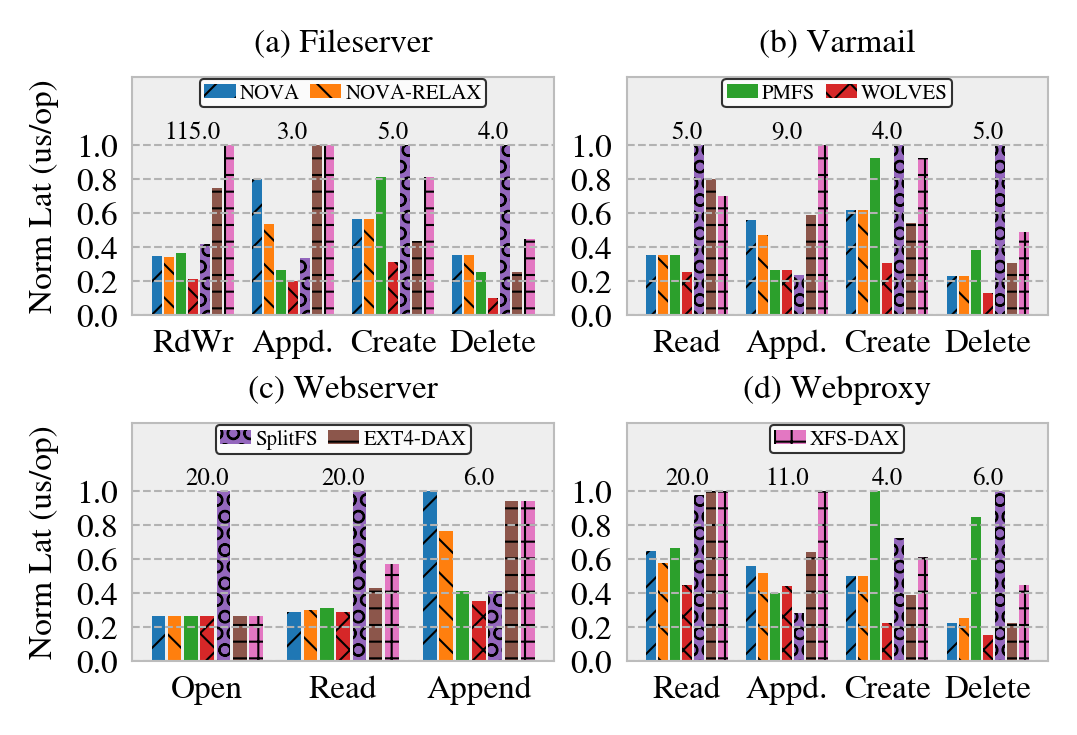

In [5]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(6)))
bar_width = 0.12
true_bar_width = 0.1
# subfig_titles = ["(a) Low Concurrency (1 thread)", "(b) High Concurrency (8 thread)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]
cmap = "tab10"
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

workloads = ["./performance-comparison-table-breakdown-fileserver", "./performance-comparison-table-breakdown-varmail", "./performance-comparison-table-breakdown-webserver", "./performance-comparison-table-breakdown-webproxy"]
workloads_remap = ["(a) Fileserver", "(b) Varmail", "(c) Webserver", "(d) Webproxy"]
# times = ["open", "append", "create", "delete"]
# times_remap = ["Open", "Append", "Create", "Delete"]
num_thread = 1
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
tot = len(fss) * bar_width
bars = []


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

for workload_idx, workload in enumerate(workloads):
    
    with open(workload, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
    
    times = [ "read", "append", "create", "delete"]
    
    if workload_idx == 0:
        times = [ "IO", "append", "create", "delete"]
        times_remap = ["RdWr", "Appd.", "Create", "Delete"]
    
    if workload_idx == 1:
        times_remap = ["Read", "Appd.", "Create", "Delete"]

    if workload_idx == 2:
        times = ["open", "read", "append"]
        times_remap = ["Open", "Read", "Append"]
    
    if workload_idx == 3:
        times_remap = ["Read", "Appd.", "Create", "Delete"]

    x = list(range(1, len(times) + 1))
    subfig = plt.subplot(2, 2, workload_idx + 1)
    # Normalize
    max_times = []
    killer_times = []
    for time_idx, time in enumerate(times):
        # df[(df['threads'] == 1)][time] = df[(df['threads'] == 1)][time] / df[time].max()
        # print(df[(df['threads'] == 1)][time])
        max_times.append(df[(df['threads'] == num_thread)][time].max())
        killer_times.append(df[(df['file_system'] == "KILLER") & (df['threads'] == num_thread)][time].iloc[0])
        df.loc[(df['threads'] == num_thread), time] = df[(df['threads'] == num_thread)][time] / df[(df['threads'] == num_thread)][time].max()

    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for time_idx, time in enumerate(times):
            if df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0] == 0:
                bws.append(0.01)
            else:
                bws.append(df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0])
        print(bws)
        # print(bws)
        # for fig_idx in range(0, len(num_threads)):
        #     for workload in workloads:
        #         bws.append(df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == num_threads[fig_idx])]['iops'].iloc[0])
        bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
        # draw max time on top of bar
        if fs == "KILLER":
            for point_idx, pivot in enumerate(x):
                plt.text(pivot, 1, "{:.1f}".format(killer_times[point_idx] * 1000), fontsize=6, ha='center', va='bottom')

        bars.append(bar)
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)

        plt.tick_params(bottom=False, top=False, left=False, right=False)
        # Draw title
        plt.xticks(x, labels=times_remap, fontsize=8)
        plt.ylim((0, 1.4))
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
        if workload_idx == 0 or workload_idx == 2:
            plt.ylabel('Norm Lat (us/op)', fontsize=8)
        # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
        plt.title(workloads_remap[workload_idx], fontsize=8)
    
legend_labels = fss
legend_labels = legend_labels.replace("SplitFS-FILEBENCH", "SplitFS")
legend_labels = legend_labels.replace("KILLER", "WOLVES")
steps = [2, 2, 2, 2]
for ax_id, ax in enumerate(fig.axes):
    start = sum(steps[:ax_id])
    end = start + steps[ax_id]

    leg = ax.legend(bars[start : end], legend_labels[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=2, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    
    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
# fig.legend(bars, legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
# fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
plt.tight_layout(pad=0.4)
plt.savefig("./FIG-MacroBreakdown-VERTICAL.pdf", bbox_inches='tight', pad_inches=0)
plt.show()